# Include \& Exclude substructures in Limeade

Substructure inclusion \& exclusion are two major functionalities in Limeade, enabling users to manipulate the generated molecules by giving Limeade specific requirements in SMILES/SMARTS form. Generally, the users only need to give a list of substructures and their types (SMILES or SMARTS) to the following two functions:
- `Mol.include_substructures`: include given substructures
- `Mol.exclude_substructures`: include given substructures

Limeade will extract information from a given substructure and encode them into constraints. The basic information consists of the type of each atom and the bonds between these atoms. Limeade can also fix the number of implicit hydrogen atoms. For SMARTS patterns, Limeade can handle multiple choices of each atom and bond.

This notebooks list some examples to show how to use Limeade to achieve practical requirements.

The required Python libraries used this notebook are as follows:
- `Limeade`: the package this notebook demonstrates. Limeade can encode molecule space with given requirements into mathematical equations and generate feasible solutions quickly.
- `rdkit`: used to plot generated molecules.

In [1]:
from Limeade import MIPMol
from rdkit import Chem

## Fix the number of implicit hydrogen atoms

### Example 1

When there is a double bonds between two carbon atoms, assume that we want both carbon atoms also linked with other atoms, that is, we do not want one of these two carbon atoms be an endpoint. To achieve this requirement, we can exclude a SMART pattern `C=[CH2]`. To make sure this command work, we also include pattern `C=C` so that each generated molecule will have at least a double bond between two carbon atoms.

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-11


  0%|          | 0/1 [00:00<?, ?it/s]

Discarded solution information
Reset all parameters


100%|██████████| 1/1 [00:00<00:00, 22.72it/s]


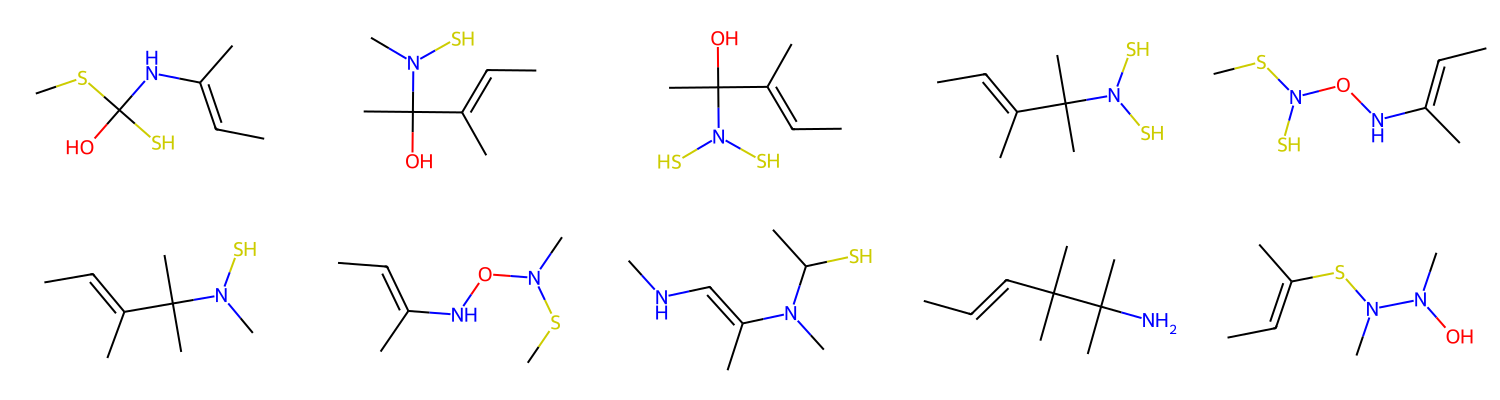

In [2]:
# set the number of atoms and types of atoms
N = 10
Mol = MIPMol(atoms=["C", "N", "O", "S"], N_atoms=N)
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None, None]
ub = [None, N // 4, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 0)

# include pattern C=C
Mol.include_substructures(["C=C"], "SMARTS")
# exclude pattern C=[CH2]
Mol.exclude_substructures(["C=[CH2]"], "SMARTS")

# generate and plot 10 molecules
mols = Mol.solve(NumSolutions=10)
Chem.Draw.MolsToGridImage([mol for mol in mols], subImgSize=(300, 200), molsPerRow=5)

### Example 2

Sometimes one might need to fix specific attachment point(s) in a ring. For example, we only want one attachment point given a benzene ring, then we can fix the number of hydrogen atoms as 1 for 5 carbon atoms and leave one as the attachment point.

  0%|          | 0/1 [00:00<?, ?it/s]

Discarded solution information
Reset all parameters


100%|██████████| 1/1 [00:00<00:00, 76.91it/s]


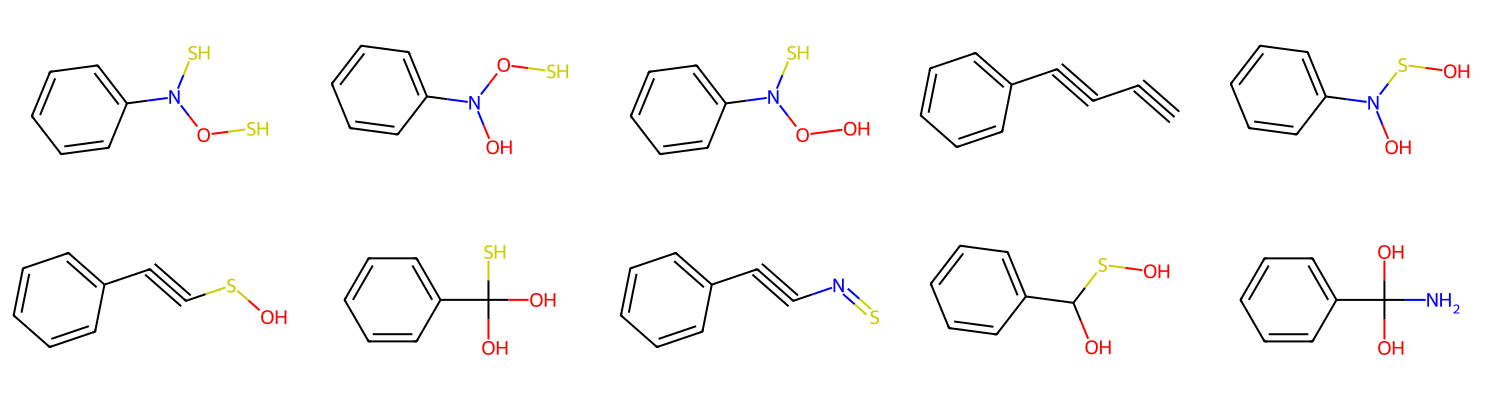

In [3]:
# set the number of atoms and types of atoms
N = 10
Mol = MIPMol(atoms=["C", "N", "O", "S"], N_atoms=N)
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None, None]
ub = [None, N // 4, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 1)

# include pattern [CH]1=[CH][CH]=[CH][CH]=C1
Mol.include_substructures(["[CH]1=[CH][CH]=[CH][CH]=C1"], "SMILES")

# generate and plot 10 molecules
mols = Mol.solve(NumSolutions=10)
Chem.Draw.MolsToGridImage([mol for mol in mols], subImgSize=(300, 200), molsPerRow=5)

## Multiple choices of each atom

### Example 3

One can specify the choices for each atom by giving a list in SMARTS. For example, we want a single bond between an oxygen atom and a nitrogen or sulfur atom.

  0%|          | 0/1 [00:00<?, ?it/s]

Discarded solution information
Reset all parameters


100%|██████████| 1/1 [00:00<00:00, 21.27it/s]


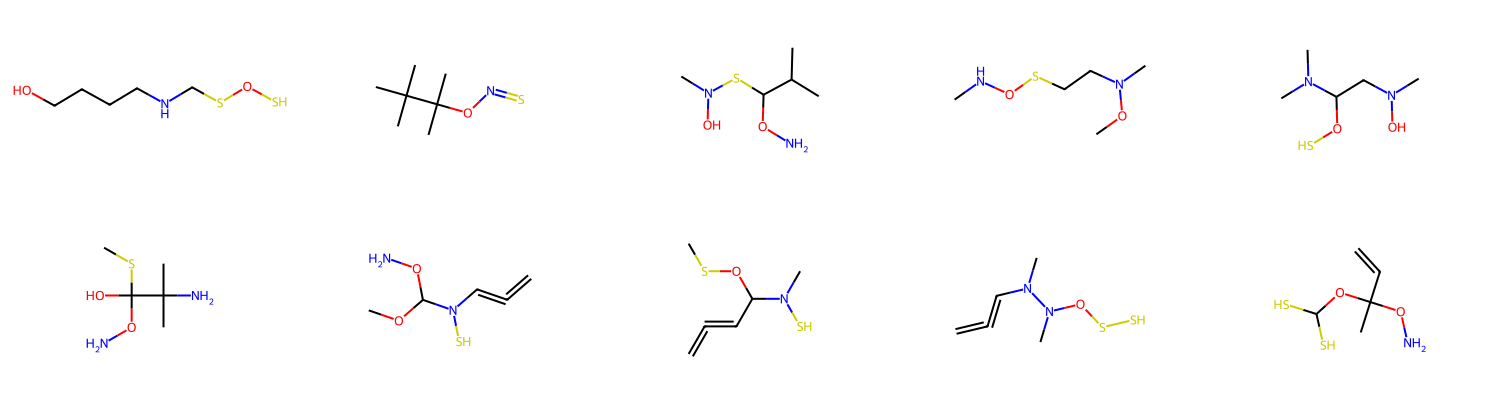

In [4]:
# set the number of atoms and types of atoms
N = 10
Mol = MIPMol(atoms=["C", "N", "O", "S"], N_atoms=N)
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None, None]
ub = [None, N // 4, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 0)

# include pattern O-[S,N]
Mol.include_substructures(["O-[S,N]"], "SMARTS")

# generate and plot 10 molecules
mols = Mol.solve(NumSolutions=10)
Chem.Draw.MolsToGridImage([mol for mol in mols], subImgSize=(300, 200), molsPerRow=5)

### Example 4

One can also just use `*` to denote arbitrary atom (from the given types of atom) and focus on the bonds. For example, we want to include allenes, that is, an atom linked with two double bonds.

  0%|          | 0/1 [00:00<?, ?it/s]

Discarded solution information
Reset all parameters


100%|██████████| 1/1 [00:00<00:00, 30.30it/s]


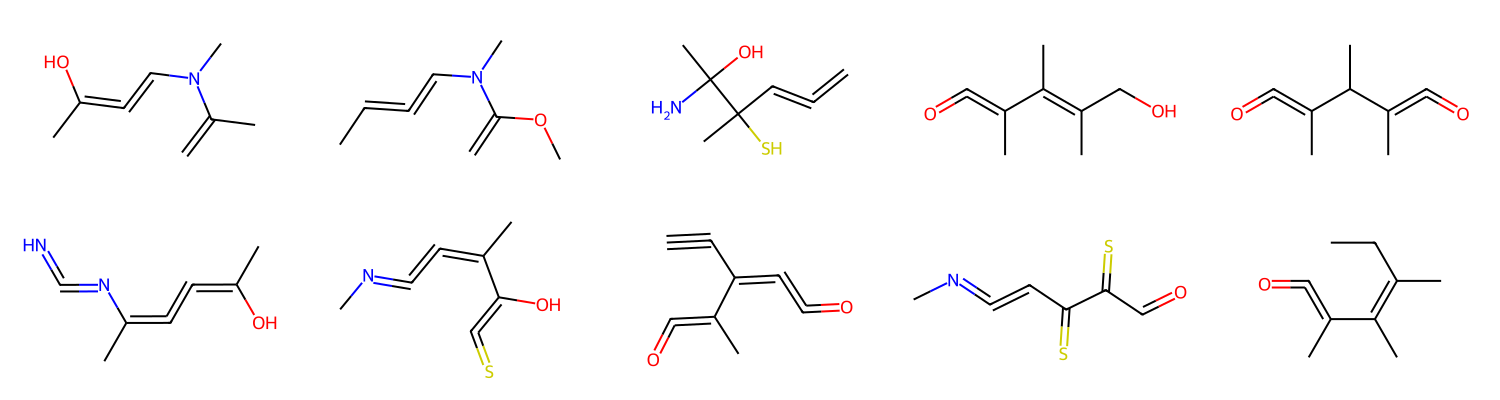

In [5]:
# set the number of atoms and types of atoms
N = 10
Mol = MIPMol(atoms=["C", "N", "O", "S"], N_atoms=N)
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None, None]
ub = [None, N // 4, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 0)

# include pattern *=*=*
Mol.include_substructures(["*=*=*"], "SMARTS")

# generate and plot 10 molecules
mols = Mol.solve(NumSolutions=10)
Chem.Draw.MolsToGridImage([mol for mol in mols], subImgSize=(300, 200), molsPerRow=5)

## Multiple choices of each bond

### Example 5

One can use `~` to denote arbitrary bonds between two atoms.

  0%|          | 0/1 [00:00<?, ?it/s]

Discarded solution information


Reset all parameters


100%|██████████| 1/1 [00:00<00:00, 31.24it/s]


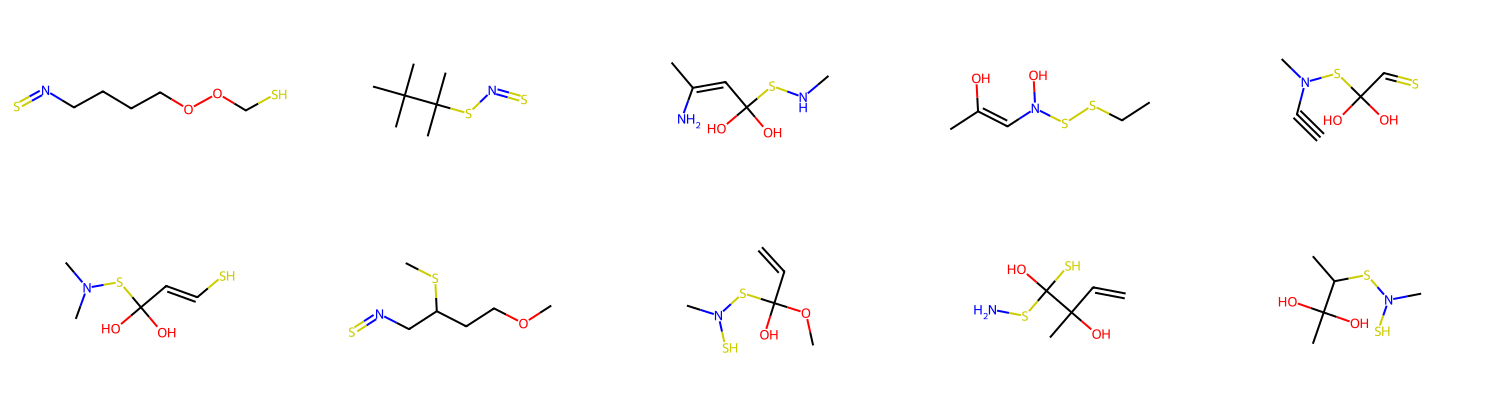

In [6]:
# set the number of atoms and types of atoms
N = 10
Mol = MIPMol(atoms=["C", "N", "O", "S"], N_atoms=N)
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None, None]
ub = [None, N // 4, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 0)

# include pattern S~N
Mol.include_substructures(["S~N"], "SMARTS")

# generate and plot 10 molecules
mols = Mol.solve(NumSolutions=10)
Chem.Draw.MolsToGridImage([mol for mol in mols], subImgSize=(300, 200), molsPerRow=5)